In [1]:
import numpy as np
import os
from nilearn.plotting import plot_glass_brain
from nilearn.plotting import plot_stat_map
from nilearn.datasets import load_mni152_brain_mask
import nibabel as nib
import cv2 as cv
from nilearn.input_data import NiftiMasker
import nilearn.image as image
from nilearn import plotting
mask_img = load_mni152_brain_mask()
AAL = image.load_img('C:\\Users\\Yin/nilearn_data\\aal_SPM12\\aal\\ROI_MNI_V4.nii')
AALatlas = np.load("C:\\Users\Yin\Desktop\ADHD200\AALatlas.npy")
AALlabelsAb = np.load("C:\\Users\Yin\Desktop\ADHD200\AALlabelsAb.npy")
AALlabelsFu = np.load("C:\\Users\Yin\Desktop\ADHD200\AALlabelsFu.npy")
import matplotlib.pyplot as plt

In [2]:
AAL = nib.Nifti1Image(AALatlas>0, AAL.affine, AAL.header)

In [8]:
root = "C:\\Users\Yin\Desktop\ADHD200\M"
Mnames= os.listdir(root)
Mdirc = []
for i in range(len(Mnames)):
    path = os.path.join(root, Mnames[i])
    Mdirc.append(path)

In [23]:
root2 = "C:\\Users\Yin\Desktop\ADHD200\Pos"
Posnames= os.listdir(root2)
Posdirc = []
for i in range(len(Mnames)):
    path = os.path.join(root2, Posnames[i])
    Posdirc.append(path)

In [24]:
Posdirc

['C:\\Users\\Yin\\Desktop\\ADHD200\\Pos\\spos.npy',
 'C:\\Users\\Yin\\Desktop\\ADHD200\\Pos\\spos2.npy',
 'C:\\Users\\Yin\\Desktop\\ADHD200\\Pos\\spos3.npy']

In [83]:
def FGcal(M):
    deletmap = np.copy(M)
    z,x = M.shape
    for i in range(z):
        for j in range(x):
            if i==j:
                deletmap[i,j] = 0
    deletmap = deletmap
    Flux = np.sum(deletmap, axis=0)
    Fout = np.sum(deletmap, axis=1)
    return (Flux-Fout)/((Flux-Fout).max())

In [84]:
def BackToMNI(target, data, spos):
    l = len(data)
    for i in range(l):
        x, y, z = spos[i, :]
        target[int(x), int(y), int(z)] = data[i]

In [85]:
def backtoMNI(data):
    BackToMNI(data, map1, spos)
    BackToMNI(data, map2, spos2)
    BackToMNI(data, map3, spos3)
    new_image = nib.Nifti1Image(9*data, mask_img.affine, mask_img.header)
    return new_image

In [93]:
M1 = np.load(Mdirc[1])
M2 = np.load(Mdirc[0])
M3 = np.load(Mdirc[2])
spos = np.load(Posdirc[0])
spos2 = np.load(Posdirc[1])
spos3 = np.load(Posdirc[2])
map1 = FGcal(M1)
map2 = FGcal(M2)
map3 = FGcal(M3)


In [94]:
back2MNI = np.zeros(91*109*91)
back2MNI = back2MNI.reshape(91, 109, 91)

In [95]:
newbrain = backtoMNI(back2MNI)

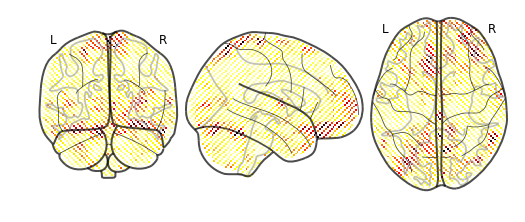

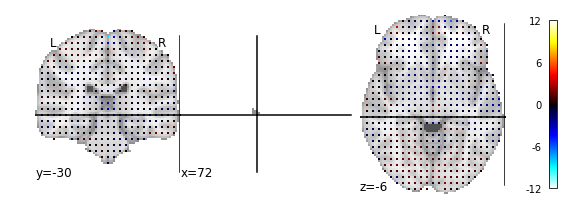

In [96]:
plot_glass_brain(newbrain)
plot_stat_map(newbrain)

In [97]:
masker = NiftiMasker(mask_img = AAL, smoothing_fwhm=8,memory='nilearn_cache', memory_level=1)
masker = masker.fit()
data2d = masker.transform(newbrain)

Snewbrain = masker.inverse_transform(data2d)

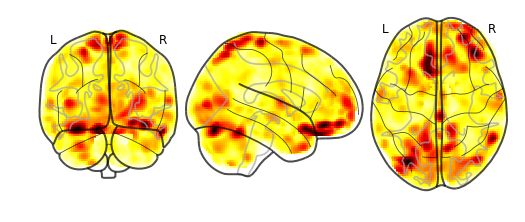

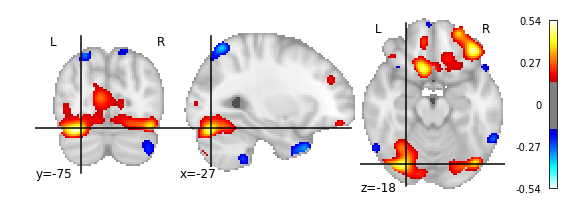

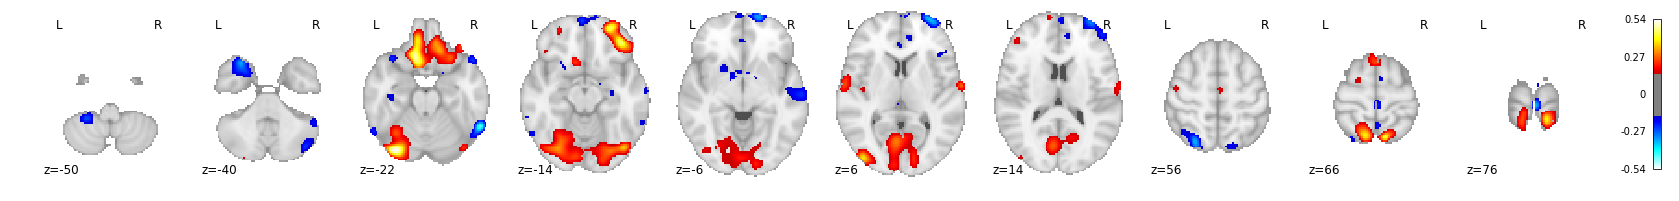

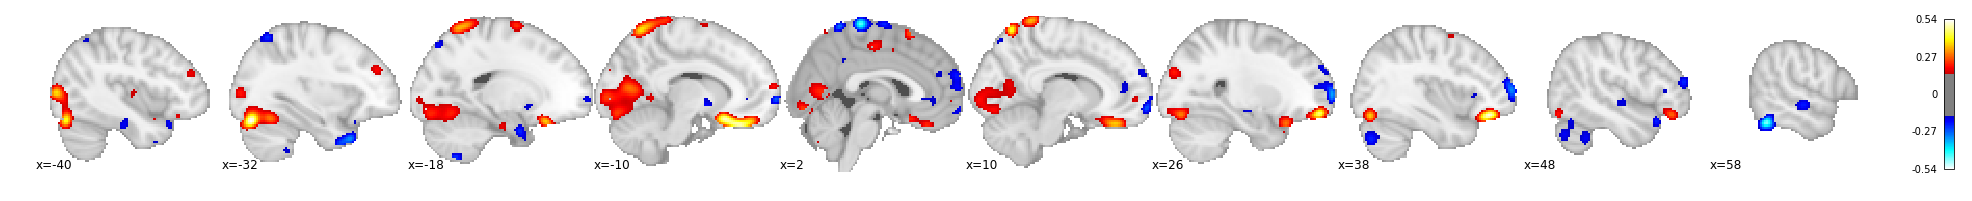

In [100]:
plot_glass_brain(Snewbrain)
plot_stat_map(Snewbrain, threshold=0.15)
plot_stat_map(Snewbrain, display_mode='z', cut_coords=10, threshold=0.15)
plot_stat_map(Snewbrain, display_mode='x', cut_coords=10, threshold=0.15)

In [101]:
def segform(data):
    x, y, z = data.shape
    segdata = np.zeros(data.shape)
    statistic = np.zeros(data.max())
    for i in range(x):
        for j in range(y):
            for k in range(z):
                if data[i,j,k] >0:
                    statistic[data[i,j,k]-1] = statistic[data[i,j,k]-1] + 1
    
    return statistic

In [102]:
SnewbrainData = Snewbrain.get_fdata()
SnewbrainData = SnewbrainData[:,:,:,0]

In [103]:
SnewbrainDataMask = SnewbrainData > 0.00015
maskatlas = AALatlas*SnewbrainDataMask
stem = segform(maskatlas)

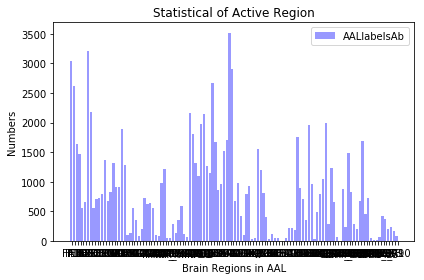

In [104]:
groups_len = len(stem)
fig, ax = plt.subplots()
index = np.arange(groups_len)
opacity = 0.4
bar_width = 0.8
rects1 = ax.bar(index, stem,bar_width,
                alpha=opacity, color='b',
                label="AALlabelsAb")
ax.set_xlabel('Brain Regions in AAL')
ax.set_ylabel('Numbers')

ax.set_title('Statistical of Active Region')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(AALlabelsAb[1:])
ax.legend()
ax.legend()
fig.tight_layout()
plt.show()

In [105]:
for i in range(len(stem)):
    print(AALlabelsAb[i],"short for ",AALlabelsFu[i]," have ",stem[i])

FAG short for  Precentral_L  have  3044.0
FAD short for  Precentral_R  have  2626.0
F1G short for  Frontal_Sup_L  have  1641.0
F1D short for  Frontal_Sup_R  have  1471.0
F1OG short for  Frontal_Sup_Orb_L  have  558.0
F1OD short for  Frontal_Sup_Orb_R  have  659.0
F2G short for  Frontal_Mid_L  have  3213.0
F2D short for  Frontal_Mid_R  have  2185.0
F2OG short for  Frontal_Mid_Orb_L  have  562.0
F2OD short for  Frontal_Mid_Orb_R  have  705.0
F3OPG short for  Frontal_Inf_Oper_L  have  733.0
F3OPD short for  Frontal_Inf_Oper_R  have  797.0
F3TG short for  Frontal_Inf_Tri_L  have  1364.0
F3TD short for  Frontal_Inf_Tri_R  have  673.0
F3OG short for  Frontal_Inf_Orb_L  have  827.0
F3OD short for  Frontal_Inf_Orb_R  have  1310.0
ORG short for  Rolandic_Oper_L  have  907.0
ORD short for  Rolandic_Oper_R  have  914.0
SMAG short for  Supp_Motor_Area_L  have  1887.0
SMAD short for  Supp_Motor_Area_R  have  1290.0
COBG short for  Olfactory_L  have  107.0
COBD short for  Olfactory_R  have  134.0
FM

In [3]:
from nilearn import datasets

atlas_data = datasets.fetch_atlas_msdl()
atlas_filename = atlas_data.maps

c:\users\yin\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\npyio.py:2266: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


In [4]:
atlas_data

{'description': b"MSDL atlas\n\n\nNotes\n-----\nResult maps of sparse dictionary learning based on resting-state data.\n\nThis can be understand as a variant of ICA based on the assumption\nof sparsity rather than independence.\n\n\nContent\n-------\n    :'maps': Nifti images with the (probabilistic) region definitions\n    :'labels': CSV file specifying the label information\n\n\nReferences\n----------\nFor more information about this dataset's structure:\nhttps://team.inria.fr/parietal/18-2/spatial_patterns/spatial-patterns-in-resting-state/\n\nMulti-subject dictionary learning to segment an atlas of brain spontaneous activity Gael Varoquaux, Alexandre Gramfort, Fabian Pedregosa, Vincent Michel, Bertrand Thirion Information Processing in Medical Imaging, 2011, pp. 562-573, Lecture Notes in Computer Science\n\nLearning and comparing functional connectomes across subjects. Gael Varoquaux, R.C. Craddock NeuroImage, 2013\n\nLicence: usage is unrestricted for non-commercial research purpo

In [5]:
atlas_filename

'C:\\Users\\Yin/nilearn_data\\msdl_atlas\\MSDL_rois\\msdl_rois.nii'

In [6]:
DMN = nib.load(atlas_filename)

In [110]:
image.index_img(DMN,0)

c:\users\yin\appdata\local\programs\python\python36\lib\site-packages\numpy\ma\core.py:2784: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


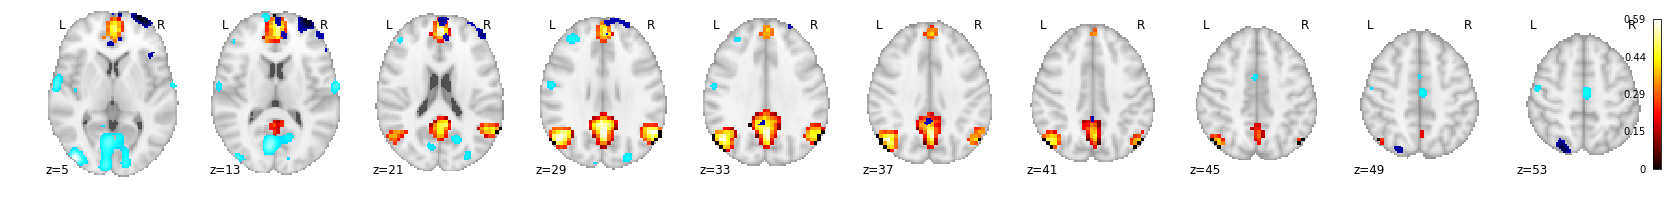

In [111]:
display = plot_stat_map(image.index_img(DMN, 4),display_mode='z', cut_coords=10,)
display.add_overlay(image.index_img(atlas_filename, 5),
                    cmap=plotting.cm.black_red)
display.add_overlay(image.index_img(atlas_filename, 6),
                    cmap=plotting.cm.black_red)
display.add_overlay(image.index_img(atlas_filename, 3),
                    cmap=plotting.cm.black_red)
display.add_overlay(Snewbrain, threshold=0.15,cmap = plotting.cm.black_blue)

In [198]:
ro = "C:\\Users\Yin\Desktop\ADHD200\Recon"

In [201]:
subjects = os.listdir(ro)
dirc = []
for i in range(len(subjects)):
    path = os.path.join(ro, subjects[i])
    dirc.append(path)

In [202]:
dirc

['C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\0010128.nii',
 'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\0027034.nii',
 'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\0027037.nii',
 'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\1517058.nii',
 'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\2014113.nii',
 'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\2497695.nii',
 'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\2950754.nii',
 'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\3007585.nii',
 'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\4134561.nii',
 'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\4164316.nii',
 'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\4275075.nii',
 'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\6115230.nii',
 'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\7774305.nii',
 'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\9750701.nii']

c:\users\yin\appdata\local\programs\python\python36\lib\site-packages\numpy\ma\core.py:2784: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


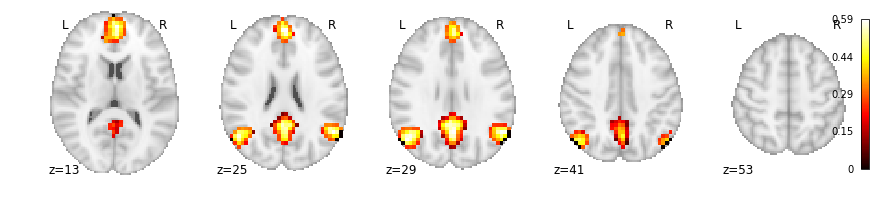

In [10]:
display = plot_stat_map(image.index_img(DMN, 4),display_mode='z', cut_coords=5,)
display.add_overlay(image.index_img(atlas_filename, 5),
                    cmap=plotting.cm.black_red)
display.add_overlay(image.index_img(atlas_filename, 6),
                    cmap=plotting.cm.black_red)
display.add_overlay(image.index_img(atlas_filename, 3),
                    cmap=plotting.cm.black_red)

c:\users\yin\appdata\local\programs\python\python36\lib\site-packages\numpy\ma\core.py:2784: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


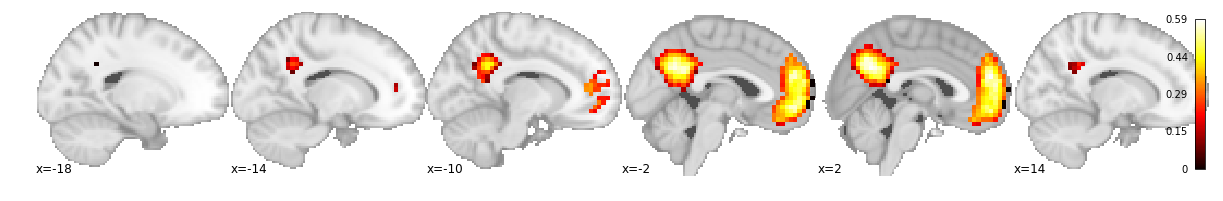

In [13]:
display = plot_stat_map(image.index_img(DMN, 4),display_mode='x', cut_coords=6,)
display.add_overlay(image.index_img(atlas_filename, 5),
                    cmap=plotting.cm.black_red)
display.add_overlay(image.index_img(atlas_filename, 6),
                    cmap=plotting.cm.black_red)
display.add_overlay(image.index_img(atlas_filename, 3),
                    cmap=plotting.cm.black_red)